In [1]:
#importing libraries for data creation

import numpy as np
import matplotlib.pyplot as plt

In [31]:
#creating data with noise

x = np.linspace(0,2,100)
exp = np.random.choice([2,3])
y = x**exp + np.random.randn(x.shape[0])/10


In [32]:
#importing scikit libraries
from sklearn.linear_model import LinearRegression
#instantiating
linreg = LinearRegression()

#reshaping data
X = x.reshape(-1,1)
Y = y.reshape(-1,1)

#fitting the line
linreg.fit(X,Y)

#making predictions
predictions= linreg.predict(X)

In [33]:
#printing results

print(predictions.flatten())
print(predictions.shape)
print(linreg.coef_, linreg.intercept_)

[-6.34276974e-01 -5.94695535e-01 -5.55114095e-01 -5.15532656e-01
 -4.75951217e-01 -4.36369777e-01 -3.96788338e-01 -3.57206898e-01
 -3.17625459e-01 -2.78044020e-01 -2.38462580e-01 -1.98881141e-01
 -1.59299702e-01 -1.19718262e-01 -8.01368229e-02 -4.05553836e-02
 -9.73944188e-04  3.86074952e-02  7.81889345e-02  1.17770374e-01
  1.57351813e-01  1.96933253e-01  2.36514692e-01  2.76096131e-01
  3.15677571e-01  3.55259010e-01  3.94840449e-01  4.34421889e-01
  4.74003328e-01  5.13584768e-01  5.53166207e-01  5.92747646e-01
  6.32329086e-01  6.71910525e-01  7.11491964e-01  7.51073404e-01
  7.90654843e-01  8.30236282e-01  8.69817722e-01  9.09399161e-01
  9.48980601e-01  9.88562040e-01  1.02814348e+00  1.06772492e+00
  1.10730636e+00  1.14688780e+00  1.18646924e+00  1.22605068e+00
  1.26563212e+00  1.30521355e+00  1.34479499e+00  1.38437643e+00
  1.42395787e+00  1.46353931e+00  1.50312075e+00  1.54270219e+00
  1.58228363e+00  1.62186507e+00  1.66144651e+00  1.70102795e+00
  1.74060939e+00  1.78019

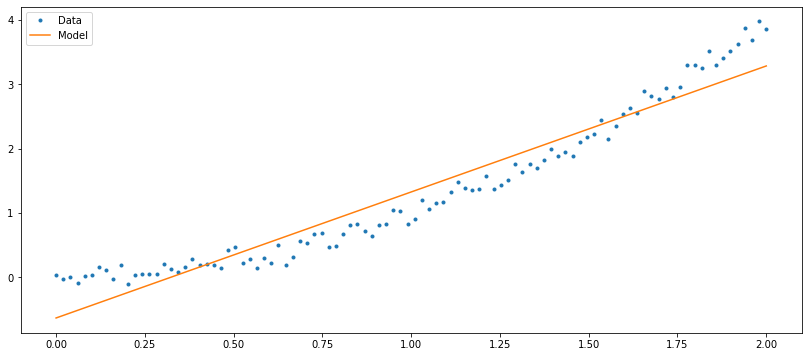

In [36]:
#visualising the data
plt.figure(figsize=[14,6])
plt.plot(X,Y,'.', label = 'Data')
plt.plot(X,predictions, label = 'Model')
plt.legend()

In [44]:
#As seen, this fit can be improved by using some additional features
#The better fit must encapsulate all the data points correctly

In [38]:
#using scikit learn Pipeline methods
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#instantiating and using class
pipe = Pipeline([
    ('polynomial_transform', PolynomialFeatures(3)),
    ('linear_fit', LinearRegression())
])


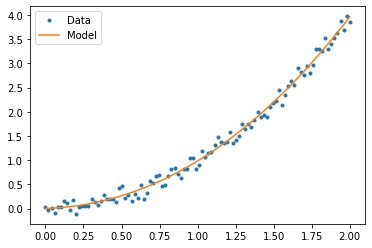

In [39]:
#fittng data
pipe.fit(X,y)
predictions = pipe.predict(X)

#visualising data
plt.plot(X,y,'.', label = 'Data')
plt.plot(X,predictions, label = 'Model')
plt.legend()

In [43]:
#evaluating
from sklearn.metrics import mean_squared_error as rms
rms1 = rms(predictions,Y)
print(rms1)


0.011004420257976868


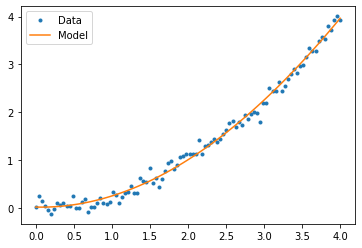

In [48]:
#Since there is a slight doubt of overfitting by which the model wont perform that well on unseen data
#Hence testing on different data

a = np.linspace(0,4,100)
exp = np.random.choice([2,3])
b = x**exp + np.random.randn(a.shape[0])/10

#reshaping
A = a.reshape(-1,1)
B = b.reshape(-1,1)

#using pipeline
#fittng data
pipe.fit(A,B)
predictions2 = pipe.predict(A)

#visualising data

plt.plot(A,B,'.', label = 'Data')
plt.plot(A,predictions2, label = 'Model')
plt.legend()


In [49]:
#evaluating

rms2 = rms(predictions2, B)
print(rms2)

0.012035460550626577


In [50]:
#comparing
print(f'RMS value for first and second models: {rms1} vs {rms2}')

RMS value for first and second models: 0.011004420257976868 vs 0.012035460550626577
